In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [2]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    a = np.unique(y)
    means = np.zeros((len(a), X.shape[1]))
    for i in a:
        x1 = X[np.where(y == i)[0]]
        means[int(i)-1] = x1.mean(axis=0)
    covmat = np.cov(X.T)
    
    return means, covmat

In [3]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    covmats = []
    labels = np.unique(y)
    means = np.zeros([labels.shape[0],X.shape[1]])

    for i in range(labels.shape[0]):
        m = np.mean(X[np.where(y == labels[i])[0],],axis=0)
        means[i,] = m
        covmats.append(np.cov(np.transpose(X[np.where(y == labels[i])[0],])))
        
    return means, covmats

In [4]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    g = 1 / np.sqrt((2*np.pi**means.shape[1])*det(covmat))
    ll = np.zeros((Xtest.shape[0], means.shape[0]))
    for i in range(Xtest.shape[0]):
        for h in range(means.shape[0]):
            b = Xtest[i, :] - means[int(h) - 1]
            t = (-1/2)*np.dot(np.dot(b.T, inv(covmat)), b)
            ll[i,int(h)-1] = g * np.e**t 
            
    ypred = []
    for row in ll:
        ypred.append(list(row).index(max(list(row)))+1)
    
    acc = 0
    for k in range(len(ypred)):
        if ypred[k] == ytest[k]:
            acc += 1
    acc = acc / len(ypred)
    ytest=ytest.flatten()
    
    return acc, np.array(ypred)

In [5]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    a = np.unique(ytest)
    ll = np.zeros((Xtest.shape[0], means.shape[0]))
    for i in range(Xtest.shape[0]):
        for h in range(means.shape[0]):
            index = int(h)-1
            b = Xtest[i, :] - means[index]
            t = (-1/2)*np.dot(np.dot(b.T, inv(covmats[index])), b)
            g = 1 / np.sqrt((2*np.pi**means.shape[1])*det(covmats[index]))
            ll[i,index] = g * np.e**t 
            
    ypred = []
    for row in ll:
        ypred.append(list(row).index(max(list(row)))+1)
    
    acc = 0
    for k in range(len(ypred)):
        if ypred[k] == ytest[k]:
            acc += 1
    acc = acc / len(ypred)
    ytest=ytest.flatten()
    
    return acc, np.array(ypred)

In [6]:
def learnOLERegression(X,y):
    # Inputs:
    # X = N x d
    # y = N x 1
    # Output:
    # w = d x 1

    # IMPLEMENT THIS METHOD
    transposed_x = np.transpose(X)
    dot_x = np.dot(transposed_x , X)
    dot_y = np.dot(transposed_x , y)
    inverse = np.linalg.inv(dot_x) 
    w = np.dot(inverse, dot_y)
    
    return w

In [7]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                

    # IMPLEMENT THIS METHOD    
    
    N, d = np.shape(X)   
    XT_dot_X = np.dot(X.T,X)
    lambd_eye = lambd*np.eye(d)
    sum_X_I_inv = np.linalg.inv( XT_dot_X + lambd_eye )
    XT_dot_y = np.dot(X.T, y)
    w = np.dot(sum_X_I_inv, XT_dot_y)
	
    return w

In [8]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse

    # IMPLEMENT THIS METHOD
    #literal converstion from the formula given
    xw = np.dot(Xtest,w)
    sub = np.subtract(ytest,xw)
    sqDif = np.square(sub)
    rmse = np.sum(sqDif)
    N = Xtest.shape[0]
    mse = np.divide(rmse,N)
    
    return mse

In [9]:
def regressionObjVal(w, X, y, lambd):
    
    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda
    
    # IMPLEMENT THIS METHOD
    N = X.shape[0]
    w = np.mat(w).T
    y_Xdw = y - np.dot(X, w) 
                      
    
    error = 0.001  * ( np.dot(y_Xdw.T, y_Xdw) + (lambd * np.dot(w.T, w)) )
    learning_rate =  0.0005
    error_grad =  X.T.dot(X.dot(w) - y) * learning_rate
    error_grad = np.ndarray.flatten(np.array(error_grad))
    
    return error, error_grad

In [10]:
def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xd - (N x (d+1)) 
	
    # IMPLEMENT THIS METHOD
    shape = x.shape[0]
    N = p+1
    Xd = np.ones((shape,N))
    for i in range(1, N):
        Xd[:, i] = pow(x,i)
        
    return Xd

LDA Accuracy = 0.97
QDA Accuracy = 0.96


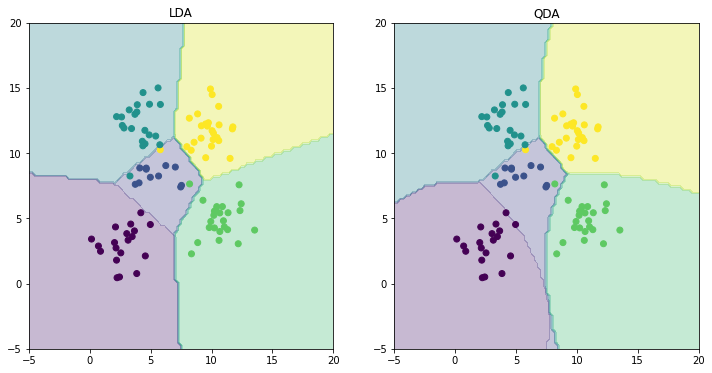

MSE without intercept 106775.36155638032
MSE with intercept 3707.8401812773254


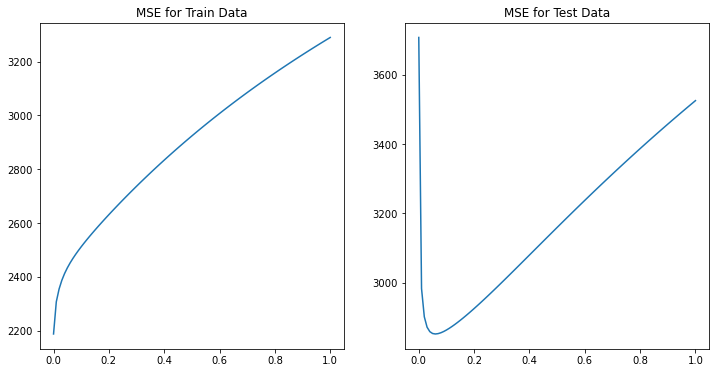

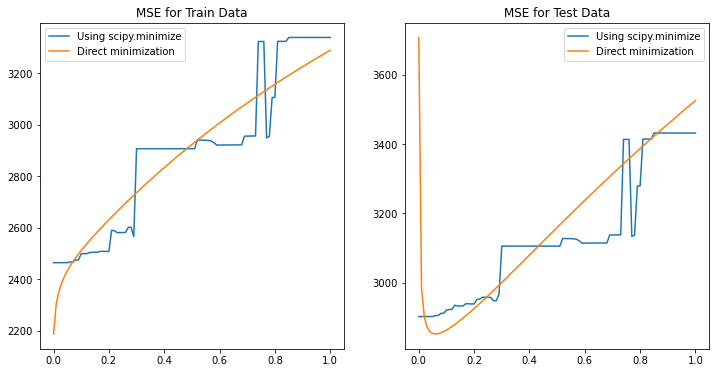

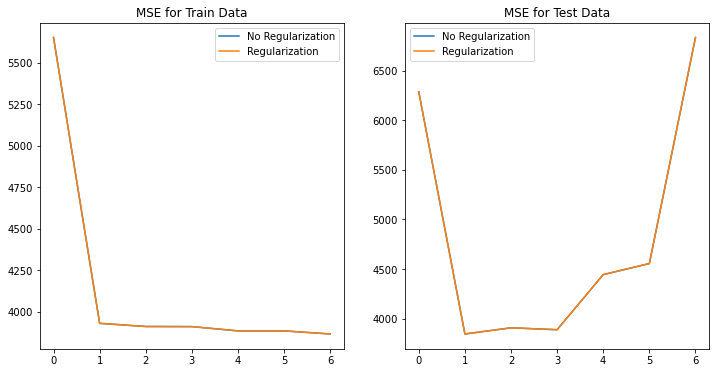

In [11]:
# Main script

# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
plt.title('QDA')

plt.show()
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()


# Problem 5
pmax = 7
lambda_opt = 0 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()